In [6]:
from IPython.display import Image

For understanding an example problem is given below.

After going through the problem feel free to change the input and visualize the difference in behavior of the system

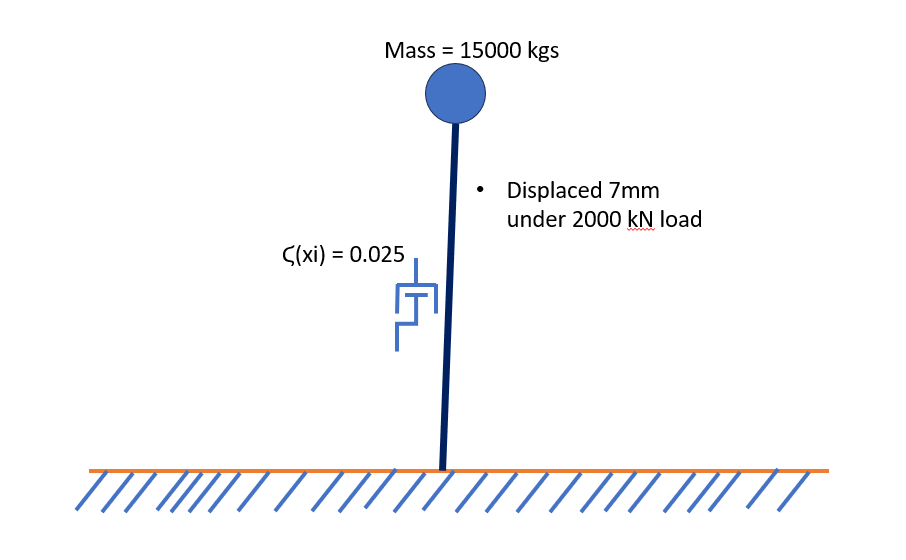

In [7]:
from IPython.display import Image

# Specify the path to the image file
image_path = 'damped_free_vibration_pic.png'  # Replace with the actual path to your image

# Display the image
Image(filename=image_path)

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# -----------------------------------------USER INPUT STARTS-----------------------------------------------
m = 10000 # in kgs
xi = 0.02 #in ratio
P = 1500 # Applied static load
u0 = 7 # Static deflection under applied static load 

### 1. Undamped natural frequency $\omega_n$ and $f_n$
$\omega_n = \sqrt\frac{k}{m}$

In [12]:
k = P/(7/1000)
omega_n = math.sqrt(k/m)
omega_n = round(omega_n,3)
fn = round(omega_n/(2*math.pi),3)
T = round(1/fn,3)

### 2. Damping Coefficents, $c$

In [13]:
c = round(2*m*omega_n*xi,3) # (Ns/m) Damping Coefficients

### 3. Logarithmic Decrement , $\delta$ 

In [14]:
delta = round(2*math.pi*xi,3) # Logarithmic Decrement

### 4. Damped Angular Natural Frequency, $\omega_d$

In [15]:
omega_d = round(omega_n*math.sqrt(1-xi**2),3)

In [16]:
### Output SO Far

print(f'The angular natural frequency is {omega_n} radians per second or {fn} Hz with a period of {T} seconds.')
print(f'The damping coeffiecent is {c} Ns/m.')
print(f'The logarithmic decrement is {delta}.')
print(f'The damped angular natural frequency is {omega_d}')

The angular natural frequency is 4.629 radians per second or 0.737 Hz with a period of 1.357 seconds.
The damping coeffiecent is 1851.6 Ns/m.
The logarithmic decrement is 0.126.
The damped angular natural frequency is 4.628


### 5. The number of cycles for amplitude to reduce to 0.001 mm

In [17]:
# For understanding the logarithmic decrement

u_start = 0.007 # aplitude at the starting cycle 
u_finish = 0.001 # aplitude at the end cycle

n = math.log(u_start/u_finish)/delta
n_full = math.ceil(n) # The number of cycles for the decrese in amplitude from u_start to u_finish
t_full = T*n_full # Time taken in sec

In [18]:
print(f'It takes {n_full} cycles with a time of {t_full} seconds for the amplitude to reduce to 0.001 mm.')

It takes 16 cycles with a time of 21.712 seconds for the amplitude to reduce to 0.001 mm.


### Free Vibration Response
\begin{equation}
u(t) = e^{-\zeta\omega_nt}[Asin(\omega_dt)+Bcos(\omega_dt)]
\end{equation}
Example Initial Conditions - 

u(t=0) = 0.007m & 
u'(t=0) = 0



The displacement function u(t) is differentiated with respect to time t to get the velocity.

NOTE TO USER :Here you have all the variables except A and B. Use the initial condition to calculate A and B accordingly

After differenciating and putting initial condition it was found that -

A = 0.00014

B = 0.007

so the final equation of displacement is
\begin{equation}
u(t) = e^{-\zeta\omega_nt}[0.00014sin(\omega_dt) + 0.007cos(\omega_dt)]
\end{equation}


 ##### Plot the response

In [19]:
tmax = 60 # Maximum time
delta_t = 0.01 # Time Step 
nPoints = int(tmax/delta_t) # The number of points in max time
t = np.linspace(0,tmax,nPoints) # Time Vector
u = math.e**(-xi*omega_n*t)*(0.00014*np.sin(omega_d*t) + 0.007 *np.cos(omega_d*t)) # Displacement

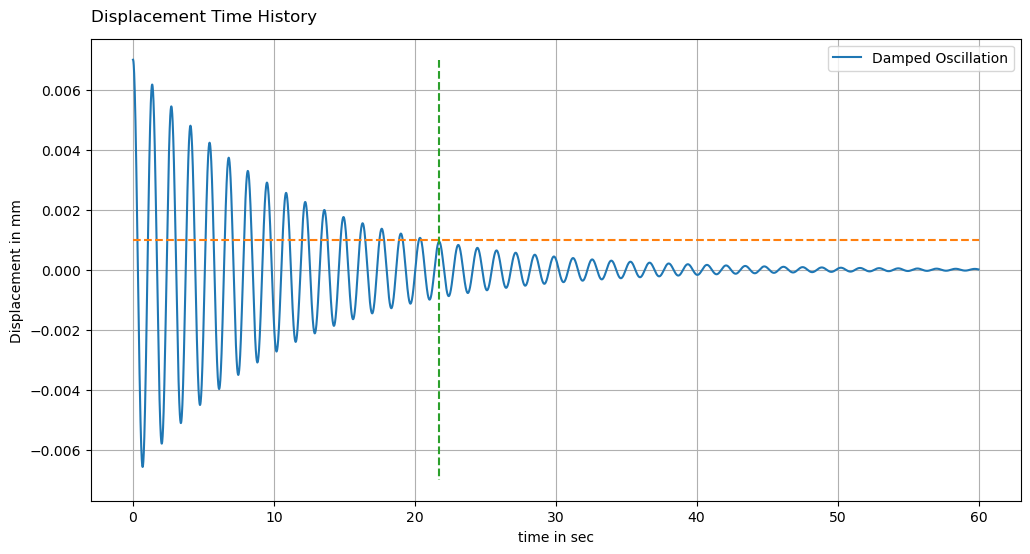

In [20]:
# Plotting
plt.figure(figsize=(12,6))
plt.title('Displacement Time History',loc='left',y = 1.02)
plt.xlabel('time in sec')
plt.ylabel('Displacement in mm')
plt.plot(t,u,label = 'Damped Oscillation')
plt.plot([0,tmax],[u_finish,u_finish],'--')
plt.plot([t_full,t_full],[u_start,-u_start],'--')
plt.grid()
plt.legend()